# Data Exploration #1
### In this file we will: 

1. Explore the dataset we have compiled.
2. Visualise the different transformations.
3. Conclude on a course of action for our training.


#### First, we make sure relative imports work

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#### Then, we fetch the dataset and run some metrics

In [2]:
from src.preparation import fetch_dataset

dataset = fetch_dataset('dataset_whole.pkl')



# Metrics
arr_Exh = []  # Exhale
num_Exh = 0
arr_Inh = []  # Inhale
num_Inh = 0
arr_Dru = []  # Drug
num_Dru = 0
arr_Noi = []  # Noise
num_Noi = 0

image_dataset = []
label_dataset = []

for idx, row in dataset.iterrows():
    if row['Label'] == 'Noise':
        arr_Noi.append(len(row['Sample'][0]))
        num_Noi += 1
        if len(row['Sample'][0]) == 0:
            a = row['Sample'][0]
            continue
    elif row['Label'] == 'Exhale':
        arr_Exh.append(len(row['Sample'][0]))
        num_Exh += 1

    elif row['Label'] == 'Inhale':
        arr_Inh.append(len(row['Sample'][0]))
        num_Inh += 1

    elif row['Label'] == 'Drug':
        arr_Dru.append(len(row['Sample'][0]))
        num_Dru += 1

# Metrics
print('Exhale:\n MinL: {0}, MaxL: {1}, Num: {2}'.format(min(arr_Exh), max(arr_Exh), num_Exh))
print('Inhale:\n MinL: {0}, MaxL: {1}, Num: {2}'.format(min(arr_Inh), max(arr_Inh), num_Inh))
print('Drug:\n MinL: {0}, MaxL: {1}, Num: {2}'.format(min(arr_Dru), max(arr_Dru), num_Dru))
print('Noise:\n MinL: {0}, MaxL: {1}, Num: {2}'.format(min(arr_Noi), max(arr_Noi), num_Noi))

Exhale:
 MinL: 4074, MaxL: 18627, Num: 404
Inhale:
 MinL: 2893, MaxL: 24179, Num: 261
Drug:
 MinL: 1942, MaxL: 8385, Num: 127
Noise:
 MinL: 0, MaxL: 20843, Num: 370


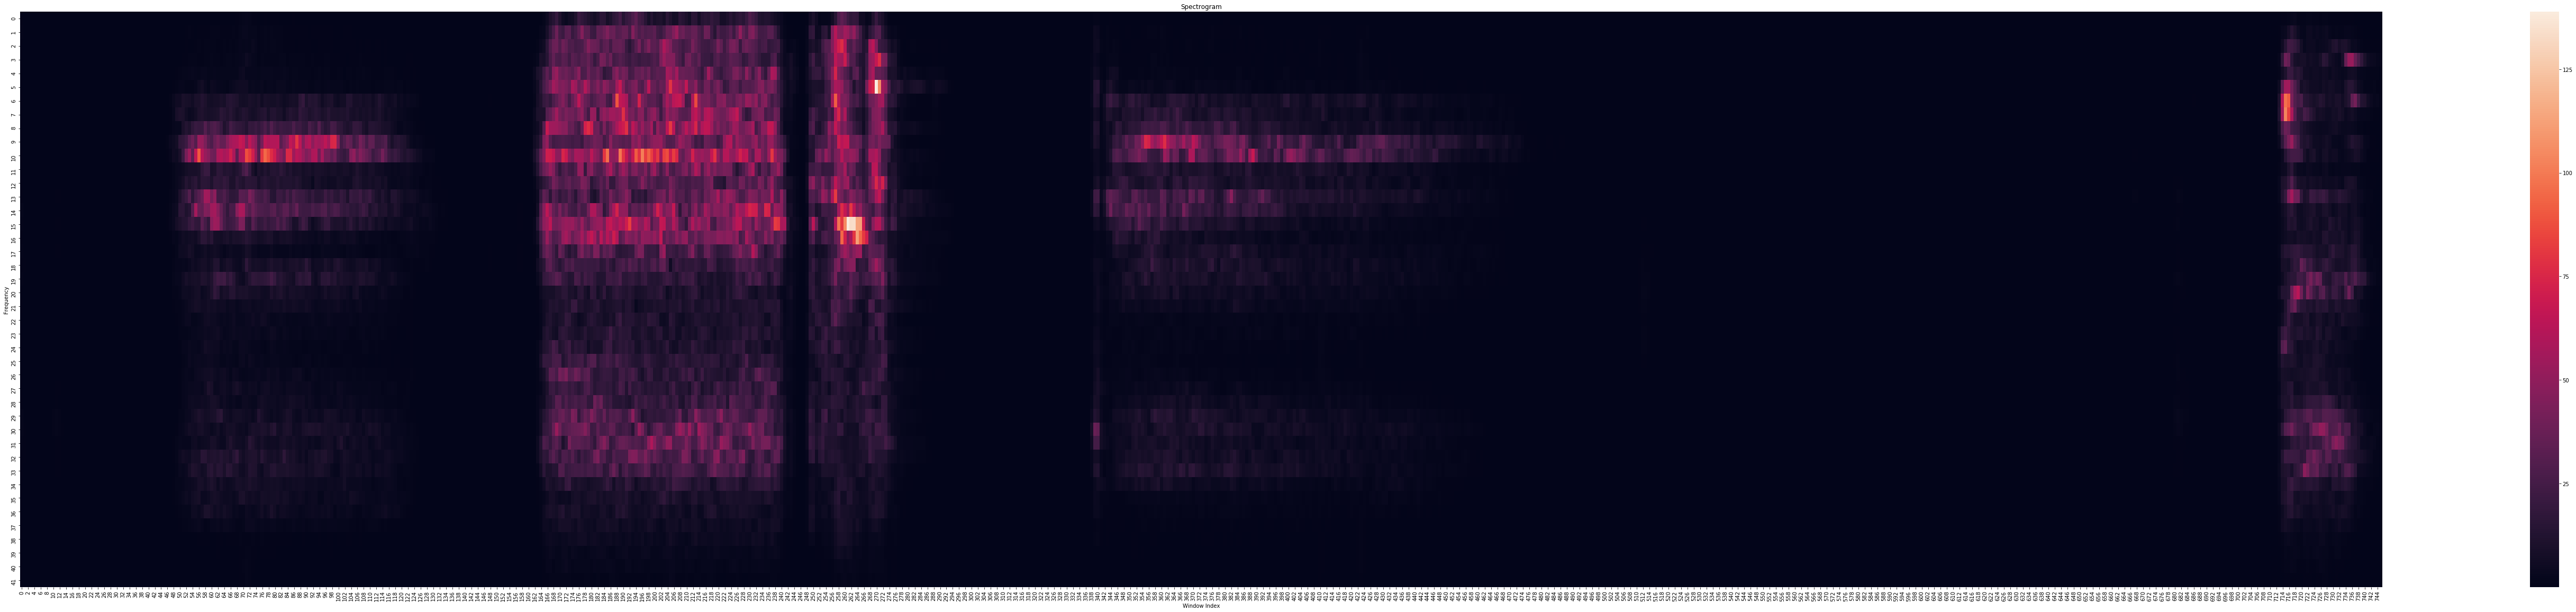

In [3]:
from numpy import genfromtxt
from src.modules.visualizer import do_heatmap
dat_spect = genfromtxt(str("/Users/noresources/Pycharm_projects/InhaleSense/data/raw/rec2018-01-22_17h41m33_spect.csv"), delimiter=",")
do_heatmap(dat_spect, title='Spectrogram')



### From the above:
1. The minimum & maximum lengths of each snippet category is shown
2. We don't have as many Drug snippets as the rest
3. We don't have as many Noise snippets as expected, but they are sufficient.

### Next, we will visualise some transformations:

---

### Noise:


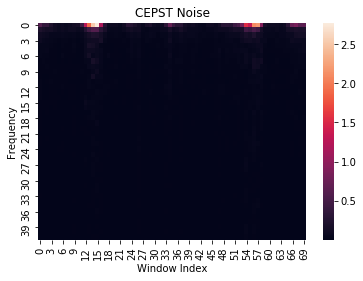

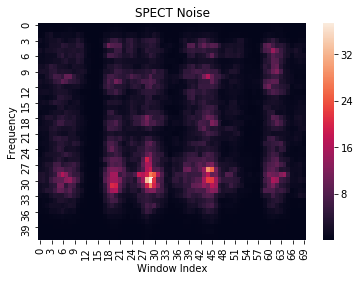

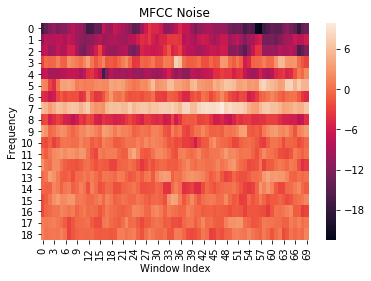

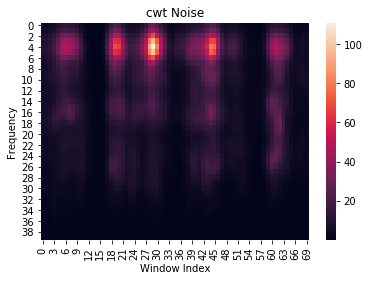

In [4]:
for idx, row in dataset.iterrows():
    if row['Label'] == 'Noise':
        label = row['Label']
        cepst = row['CEPST'][0]
        do_heatmap(cepst, title='CEPST '+label )

        spect = row['SPECT'][0]
        do_heatmap(spect, title='SPECT ' + label)
        
        mfcc = row['MFCC'][0]
        do_heatmap(mfcc, title='MFCC ' + label)
        
        cwt = row['CWT'][0]
        do_heatmap(cwt, title='cwt ' + label)
        
        break

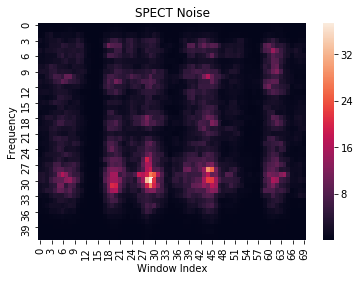

In [5]:
for idx, row in dataset.iterrows():
    if row['Label'] == 'Noise':
        label = row['Label']
        
        spect = row['SPECT'][0]
        do_heatmap(spect, title='SPECT ' + label)
        
        break


---
### Exhale:

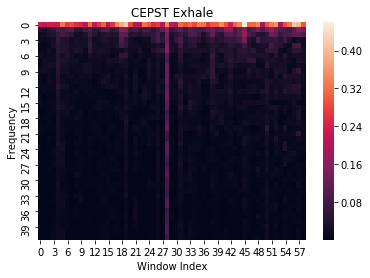

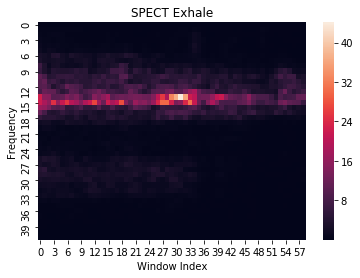

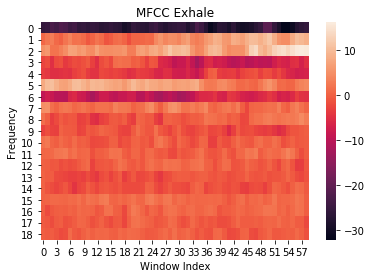

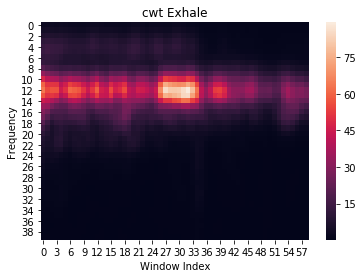

In [6]:
for idx, row in dataset.iterrows():
    if row['Label'] == 'Exhale':
        label = row['Label']
        cepst = row['CEPST'][0]
        do_heatmap(cepst, title='CEPST '+label )

        spect = row['SPECT'][0]
        do_heatmap(spect, title='SPECT ' + label)
        
        mfcc = row['MFCC'][0]
        do_heatmap(mfcc, title='MFCC ' + label)
        
        cwt = row['CWT'][0]
        do_heatmap(cwt, title='cwt ' + label)
        
        break

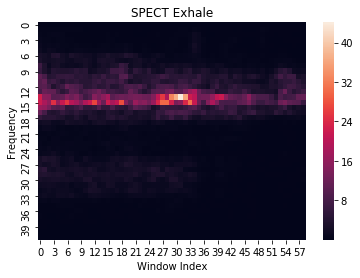

In [7]:
for idx, row in dataset.iterrows():
    if row['Label'] == 'Exhale':
        label = row['Label']
        
        spect = row['SPECT'][0]
        do_heatmap(spect, title='SPECT ' + label)
        
        break

---

### Inhale:

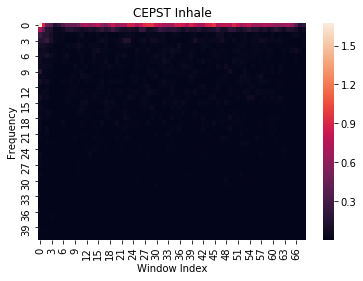

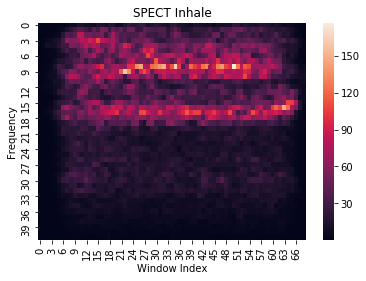

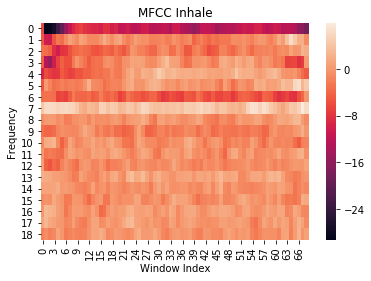

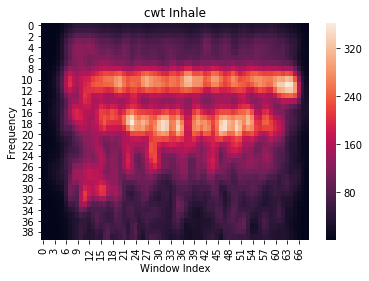

In [8]:
for idx, row in dataset.iterrows():
    if row['Label'] == 'Inhale':
        label = row['Label']
        cepst = row['CEPST'][0]
        do_heatmap(cepst, title='CEPST '+label )

        spect = row['SPECT'][0]
        do_heatmap(spect, title='SPECT ' + label)
        
        mfcc = row['MFCC'][0]
        do_heatmap(mfcc, title='MFCC ' + label)
        
        cwt = row['CWT'][0]
        do_heatmap(cwt, title='cwt ' + label)
        
        break

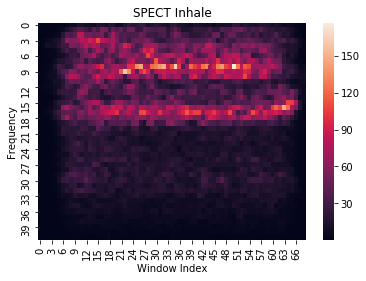

In [9]:
for idx, row in dataset.iterrows():
    if row['Label'] == 'Inhale':
        label = row['Label']
        
        spect = row['SPECT'][0]
        do_heatmap(spect, title='SPECT ' + label)
        
        break

---

### Drug:

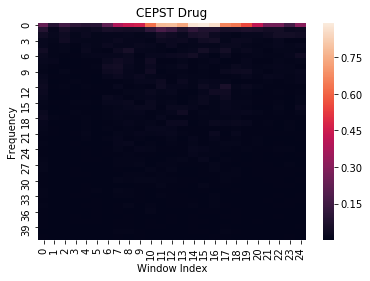

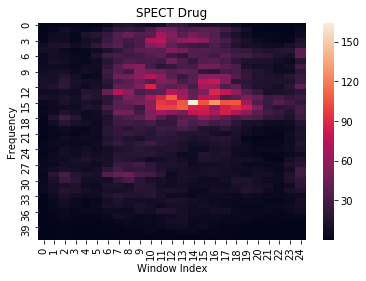

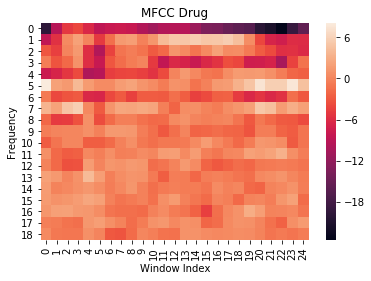

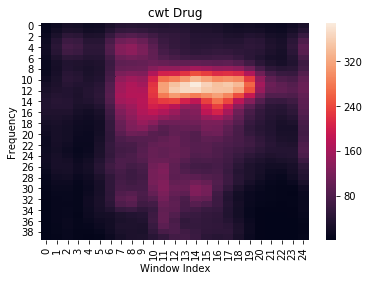

In [10]:
for idx, row in dataset.iterrows():
    if row['Label'] == 'Drug':
        label = row['Label']
        cepst = row['CEPST'][0]
        do_heatmap(cepst, title='CEPST '+label )

        spect = row['SPECT'][0]
        do_heatmap(spect, title='SPECT ' + label)
        
        mfcc = row['MFCC'][0]
        do_heatmap(mfcc, title='MFCC ' + label)
        
        cwt = row['CWT'][0]
        do_heatmap(cwt, title='cwt ' + label)
        
        break

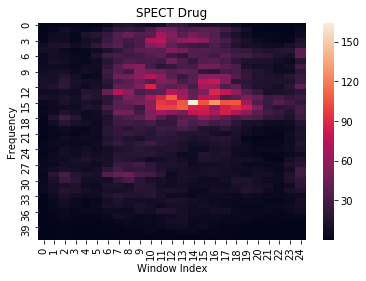

In [11]:
for idx, row in dataset.iterrows():
    if row['Label'] == 'Drug':
        label = row['Label']
        
        spect = row['SPECT'][0]
        do_heatmap(spect, title='SPECT ' + label)
        
        break

***
# Conclusion

### We can see from the above that the transformations provide adequate differentiation between labels.

### The spectrogram is chosen as the most representative out of the 4.
